## **Exploratory Data Analysis**

## **1.0 Import Libraries**

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **2.0 Load Dataset**

In [15]:
df=pd.read_csv('../Artifacts/train.csv')

## **3.0 Data Exploration**

In [16]:
## Sneak peak of the data
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [17]:
## Shape of Dataset
print(f"Dataset have {df.shape[0]} rows and {df.shape[1]} Columns.")

Dataset have 2190 rows and 13 Columns.


In [18]:
## Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [19]:
# Statistical Summary
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [20]:
## Missing Values
df.isna().sum().sort_values(ascending=False)

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [21]:
## Checkig if duplicate
df.duplicated().sum()

0

**Observation Set:**

- `id` column needs to be dropped as it is irrelavent to the model.
- No null or Duplicated value found🥳

## **4.0 Exploratory Data Analysis**

In [22]:
def eda_wrt_rainfall(feature_name, y_var=df["rainfall"]):
    fig,ax=plt.subplots(2,2,figsize=(16,8))
    fig.suptitle(f"{feature_name}", fontsize=20, fontweight='bold')
    # kdeplot of variables
    sns.histplot(ax=ax[0,0], x=df[feature_name],hue=y_var, kde=True, palette='Set1')
    ax[0,0].set_title("KdePlot")
    # Boxplot of variables
    sns.boxplot(ax=ax[0,1],x=df[feature_name], hue=y_var, palette='Set1')
    ax[0,1].set_title("BoxPlot")
    # violinplot
    sns.violinplot(ax=ax[1,0], x=df[feature_name], hue=y_var, palette='Set1')
    ax[1,0].set_title("ViolinPlot")

    # Tight Layout
    plt.tight_layout()
    plt.show()

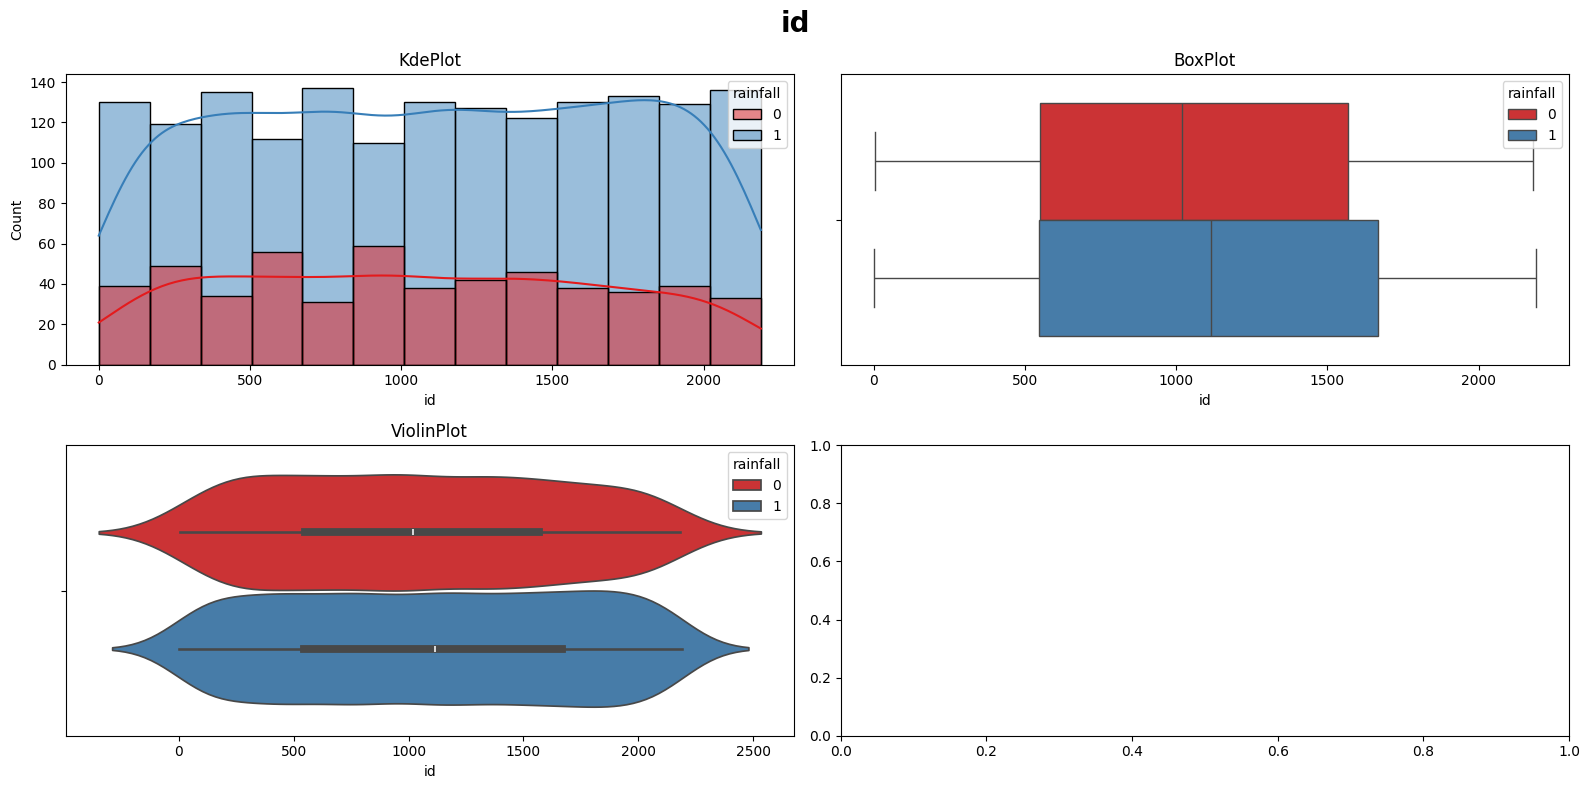

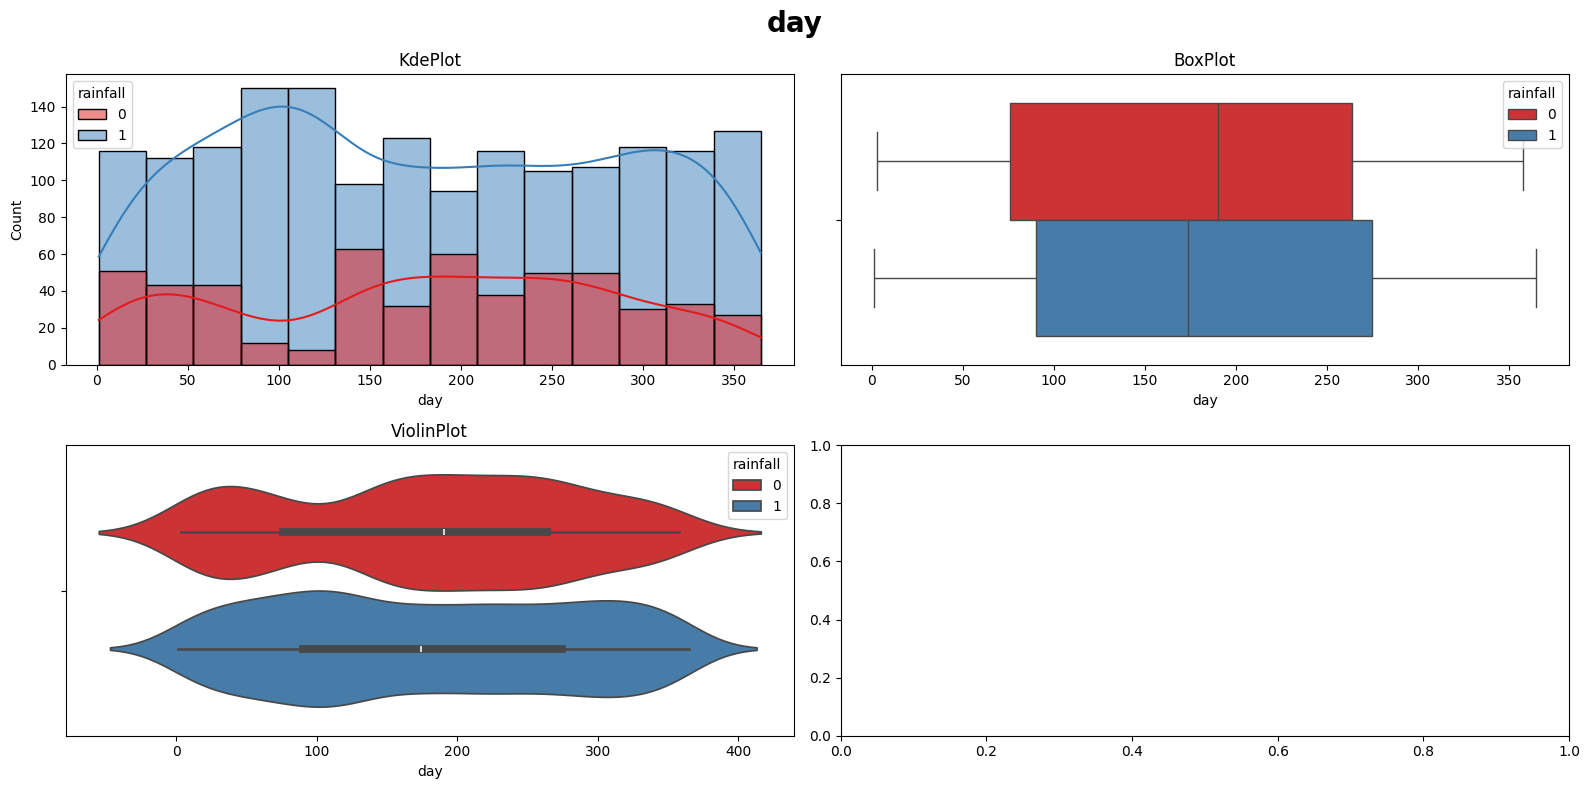

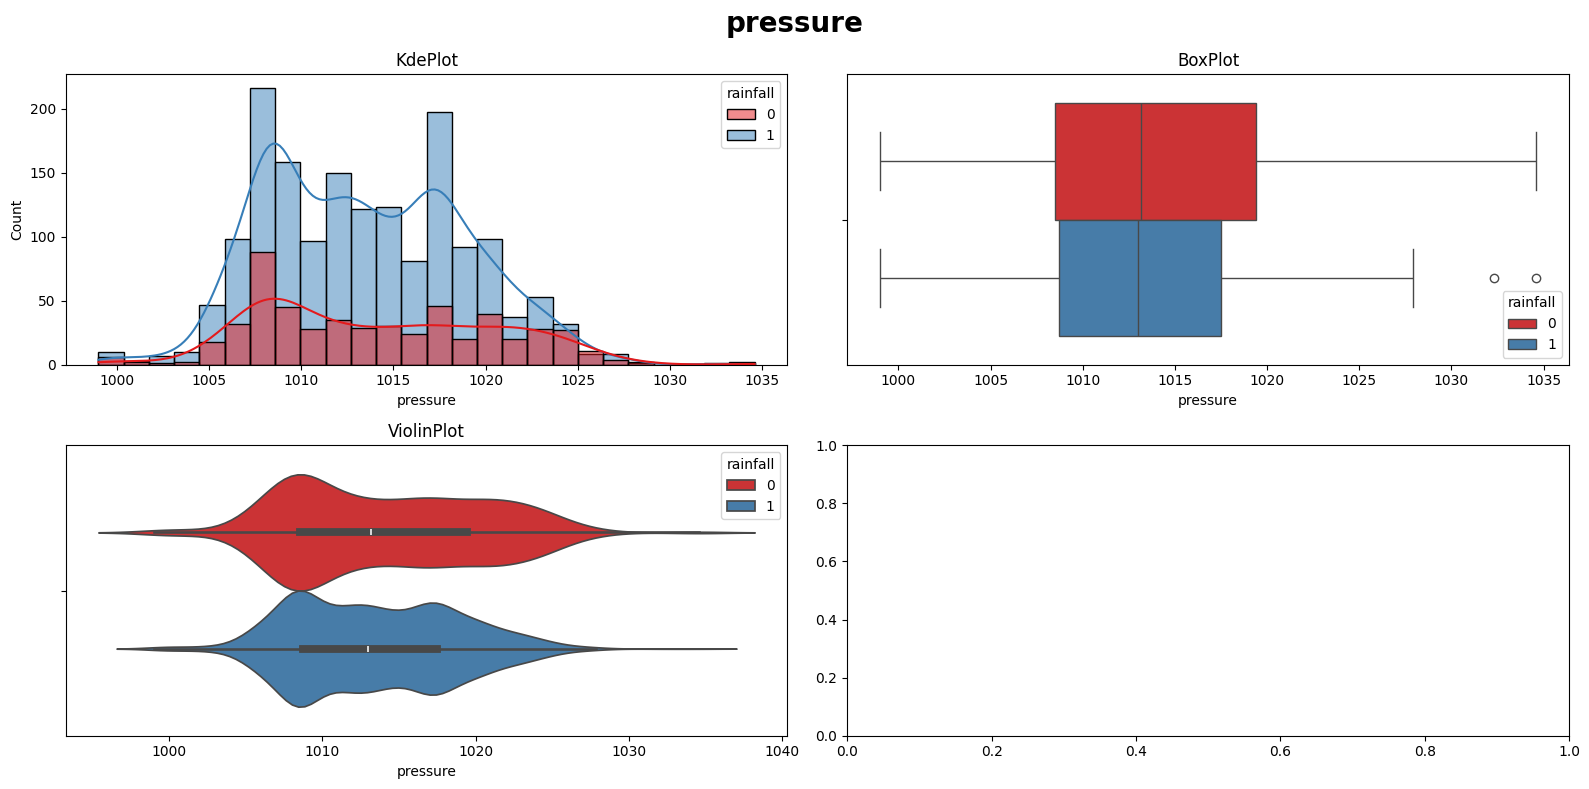

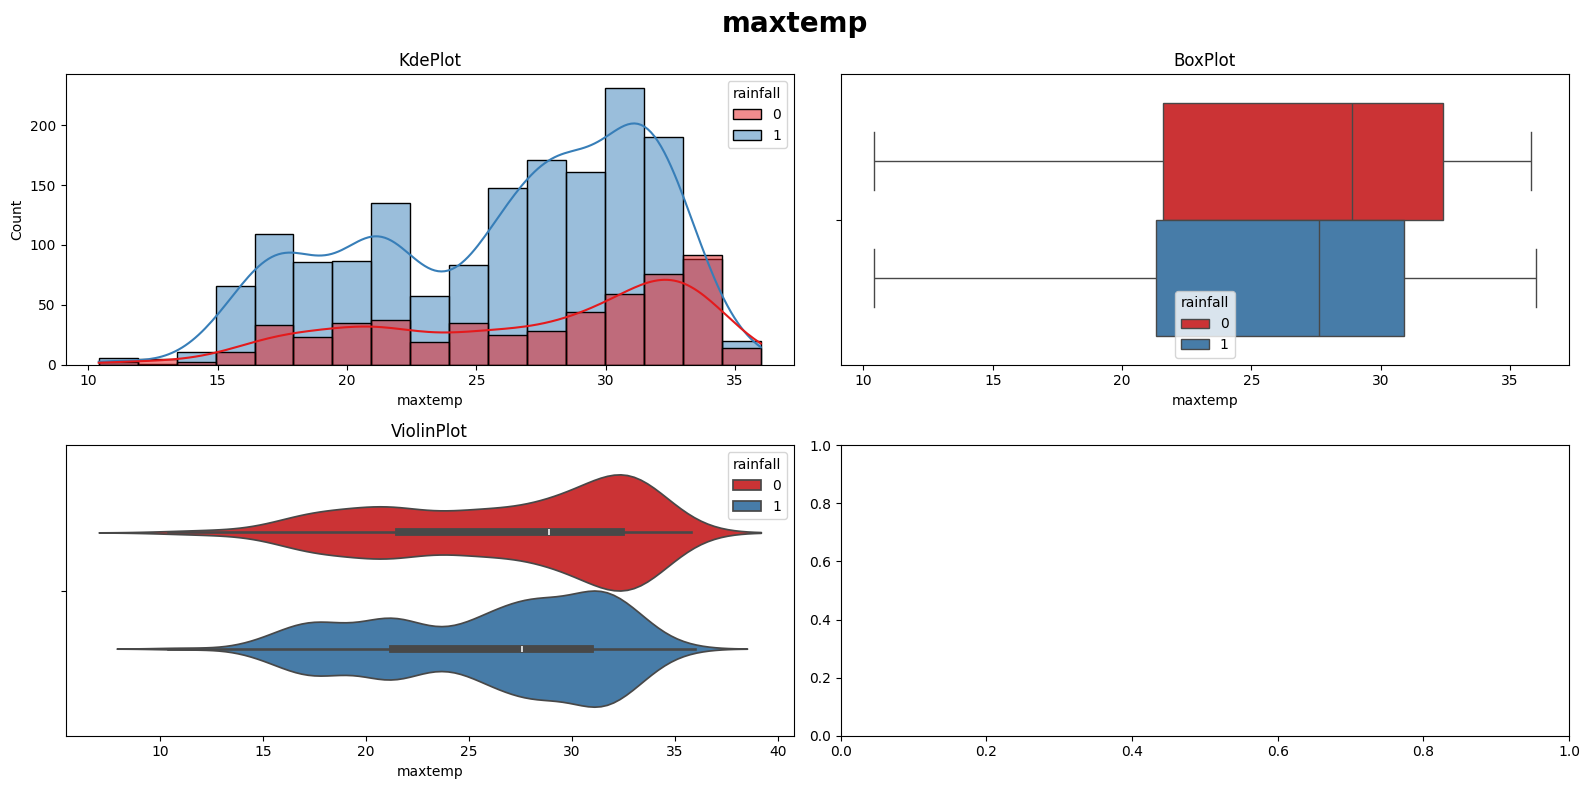

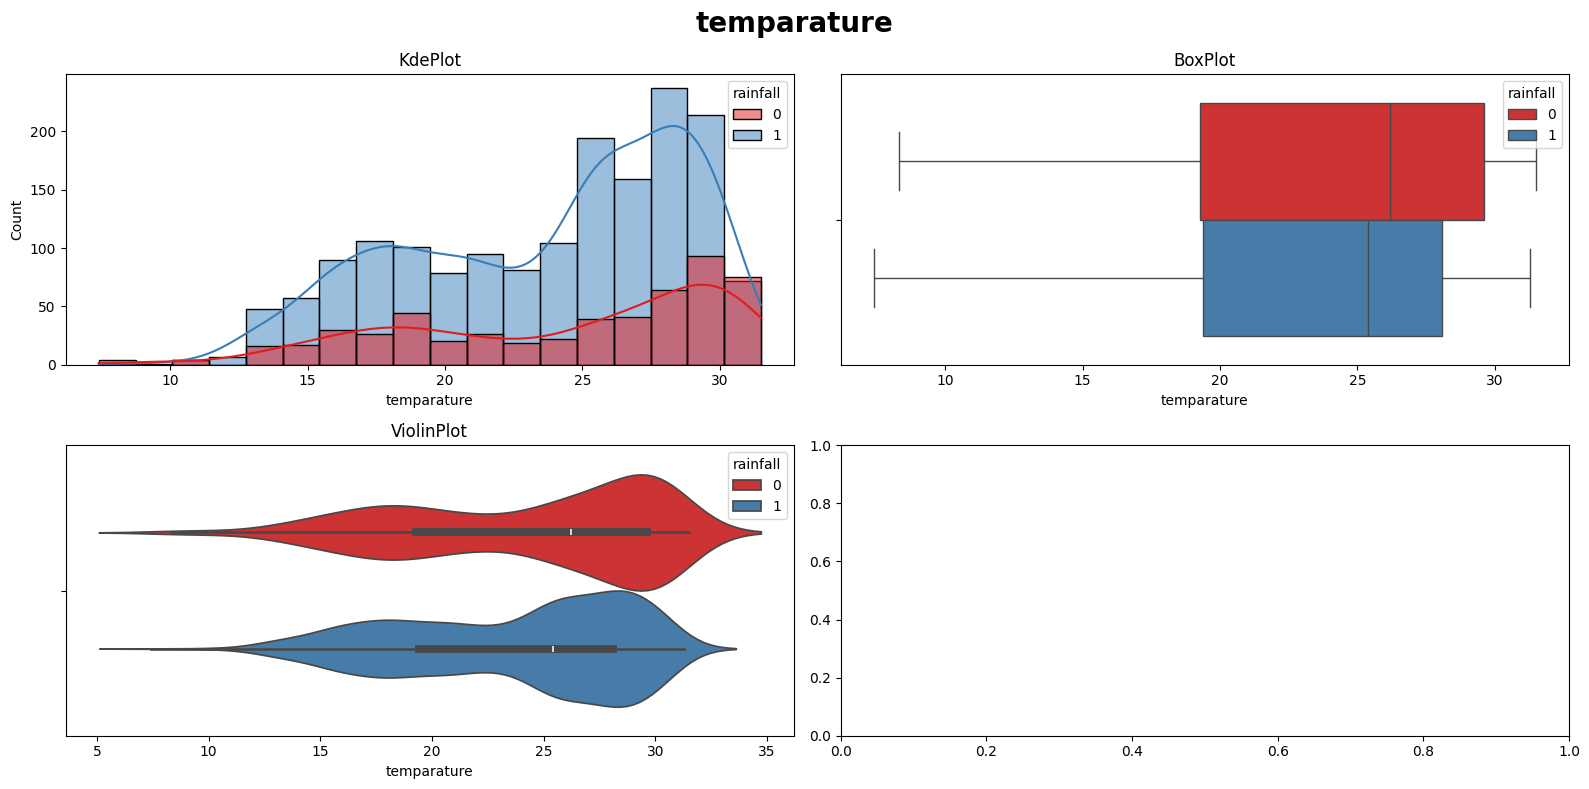

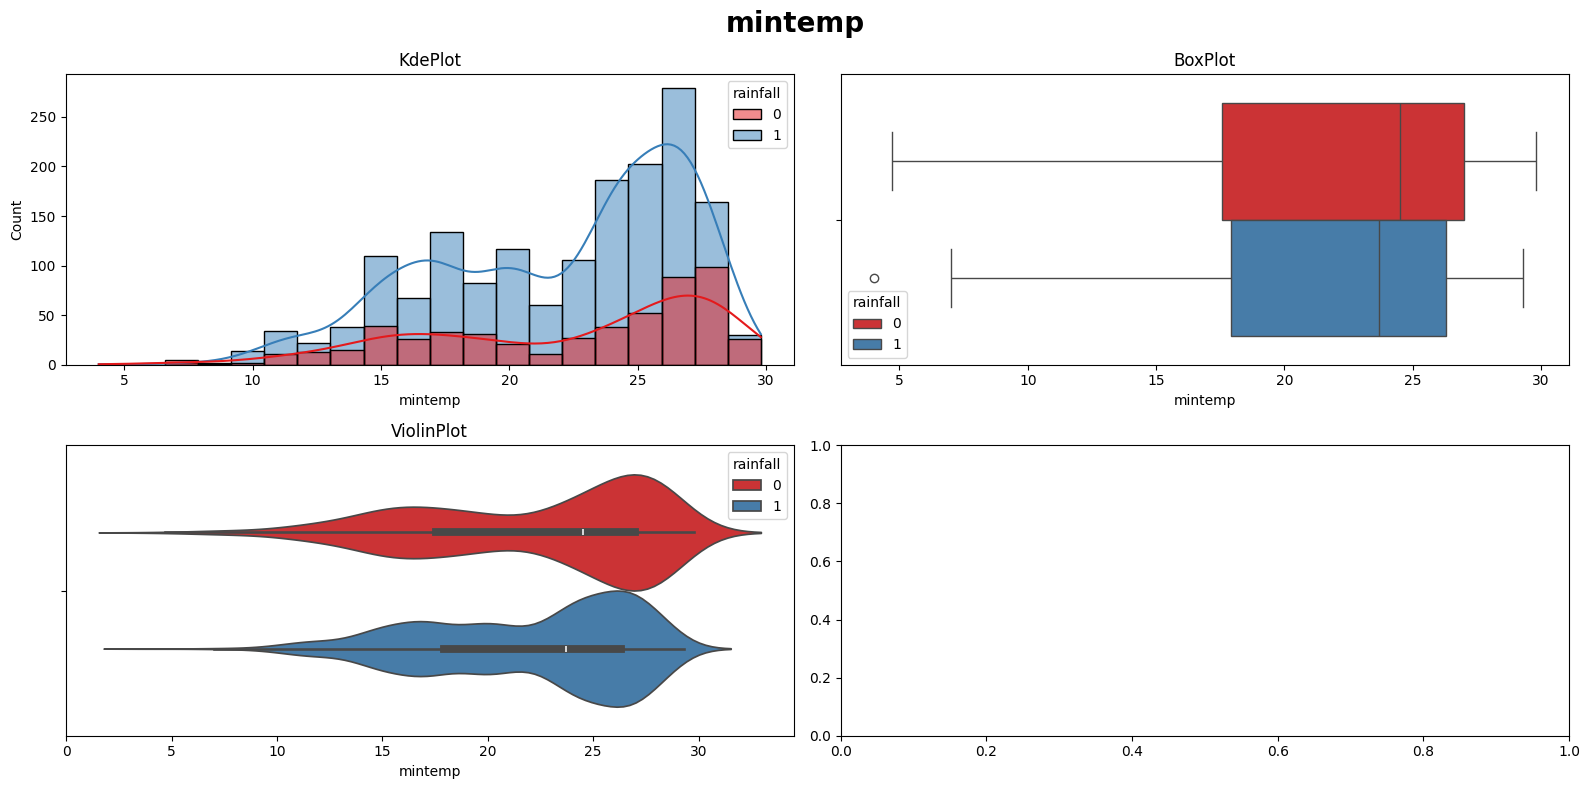

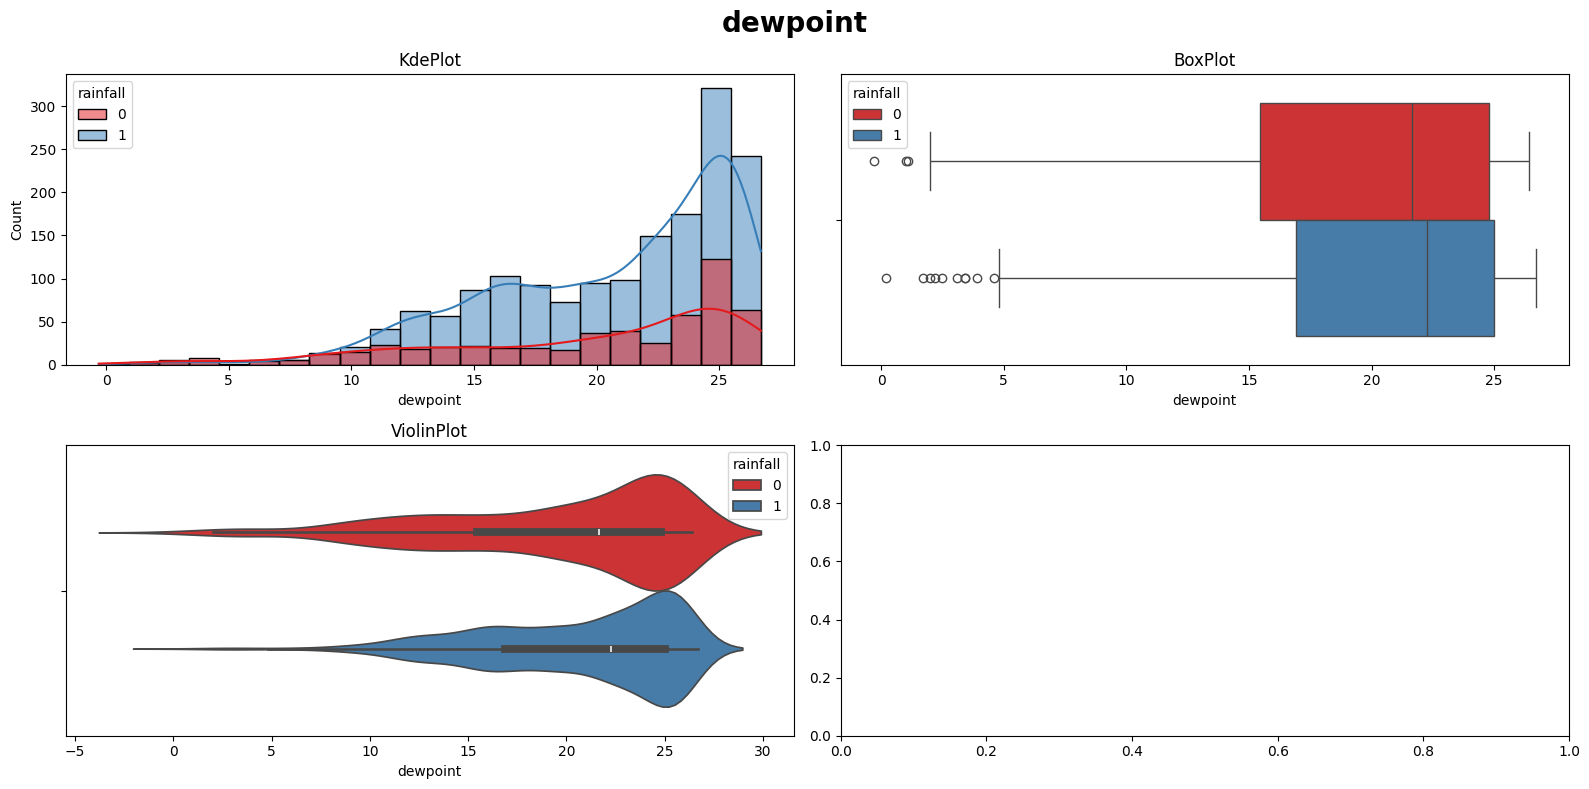

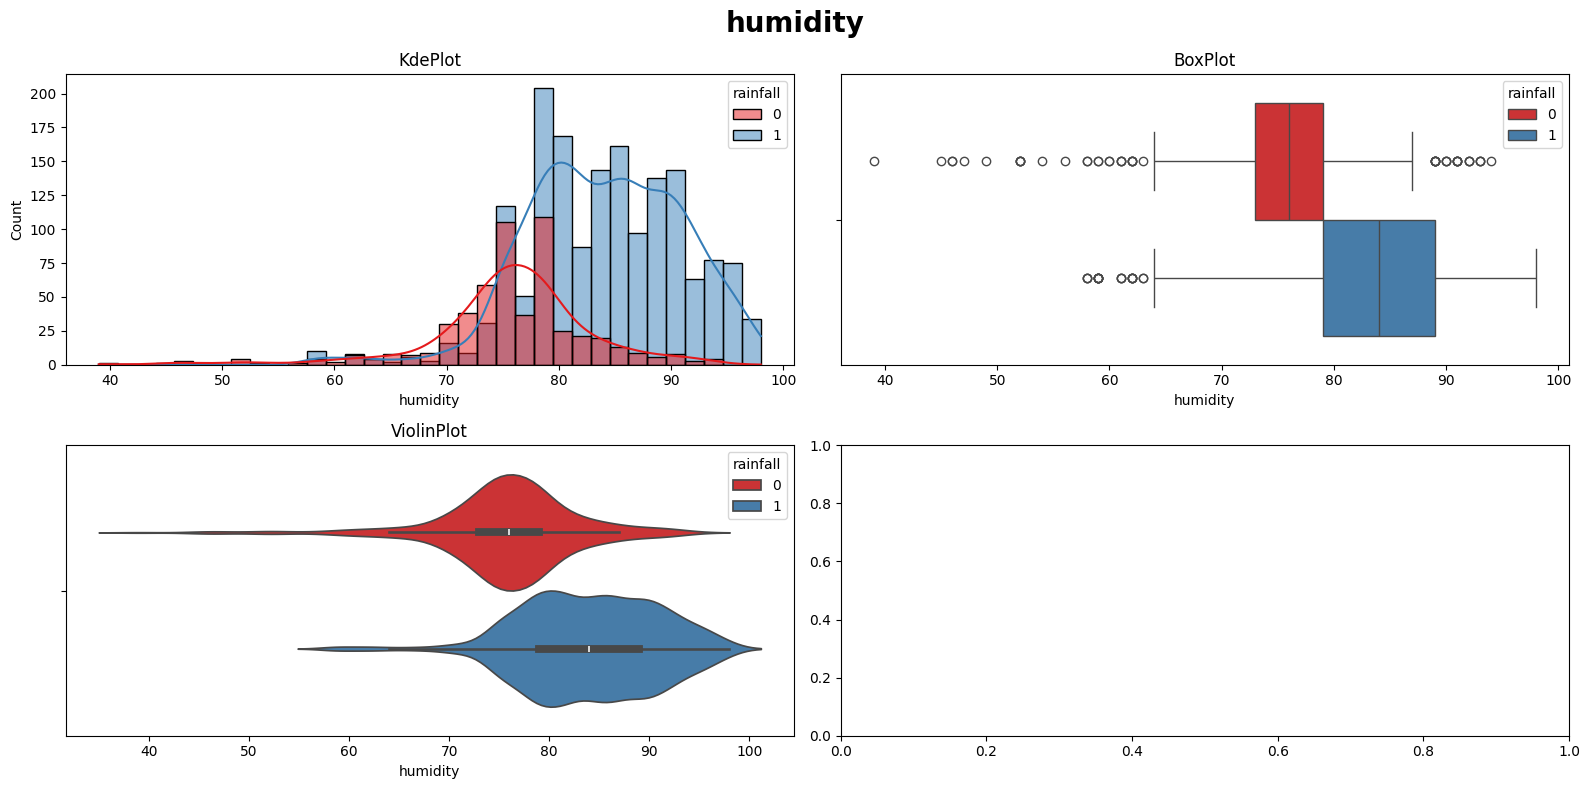

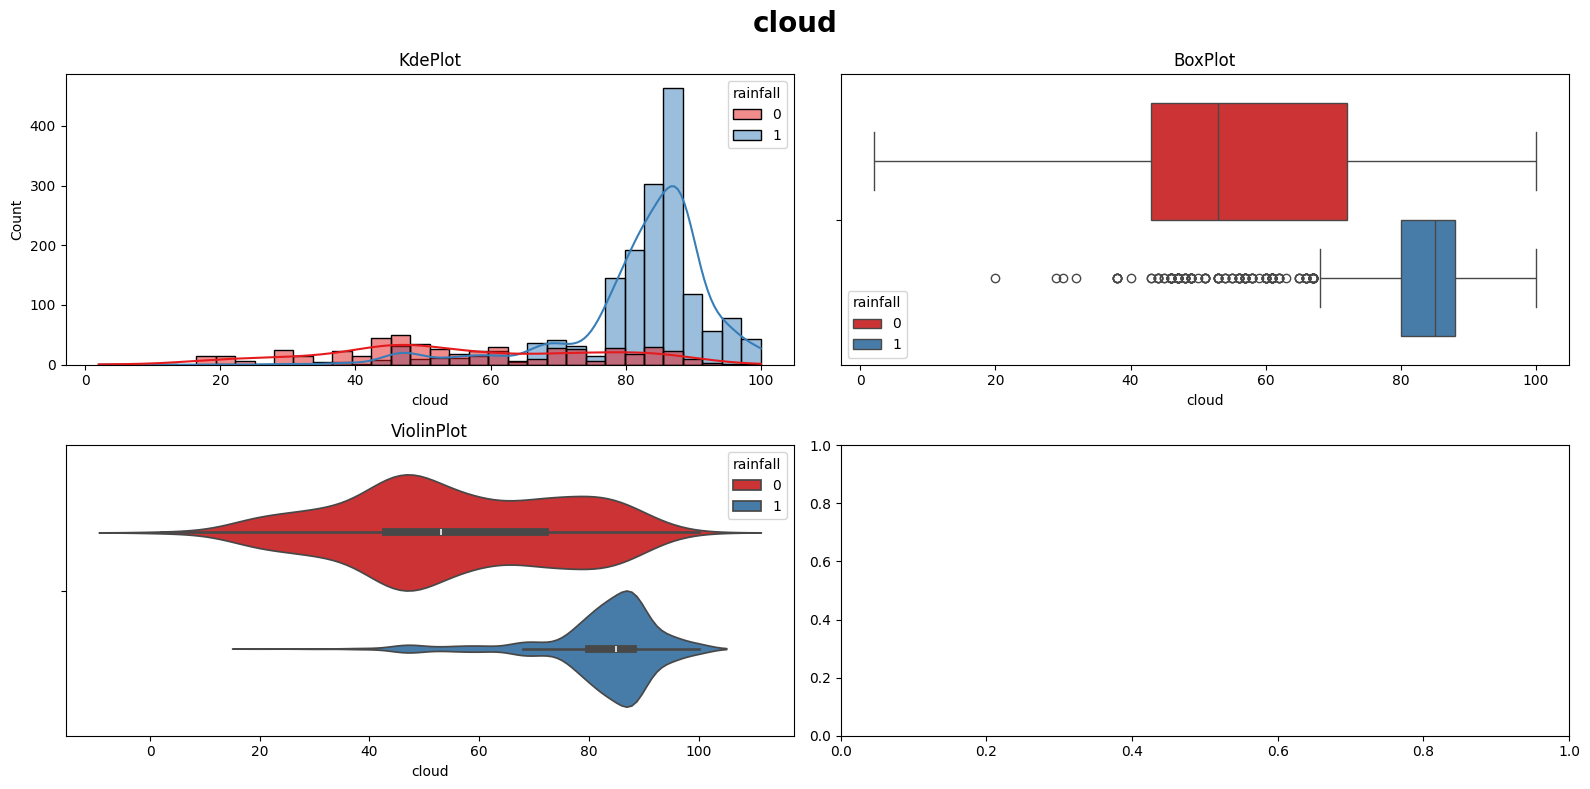

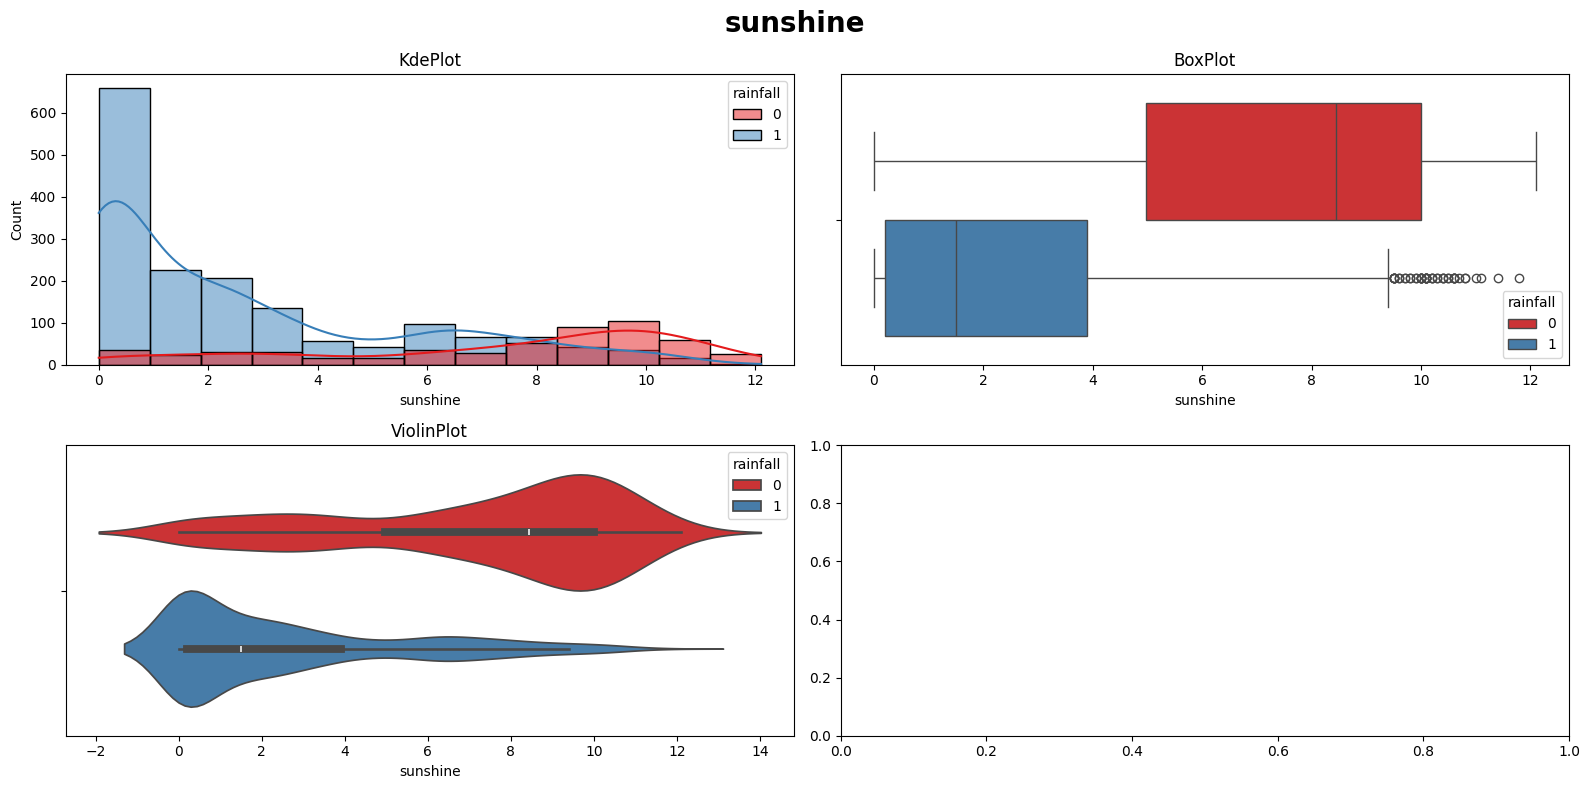

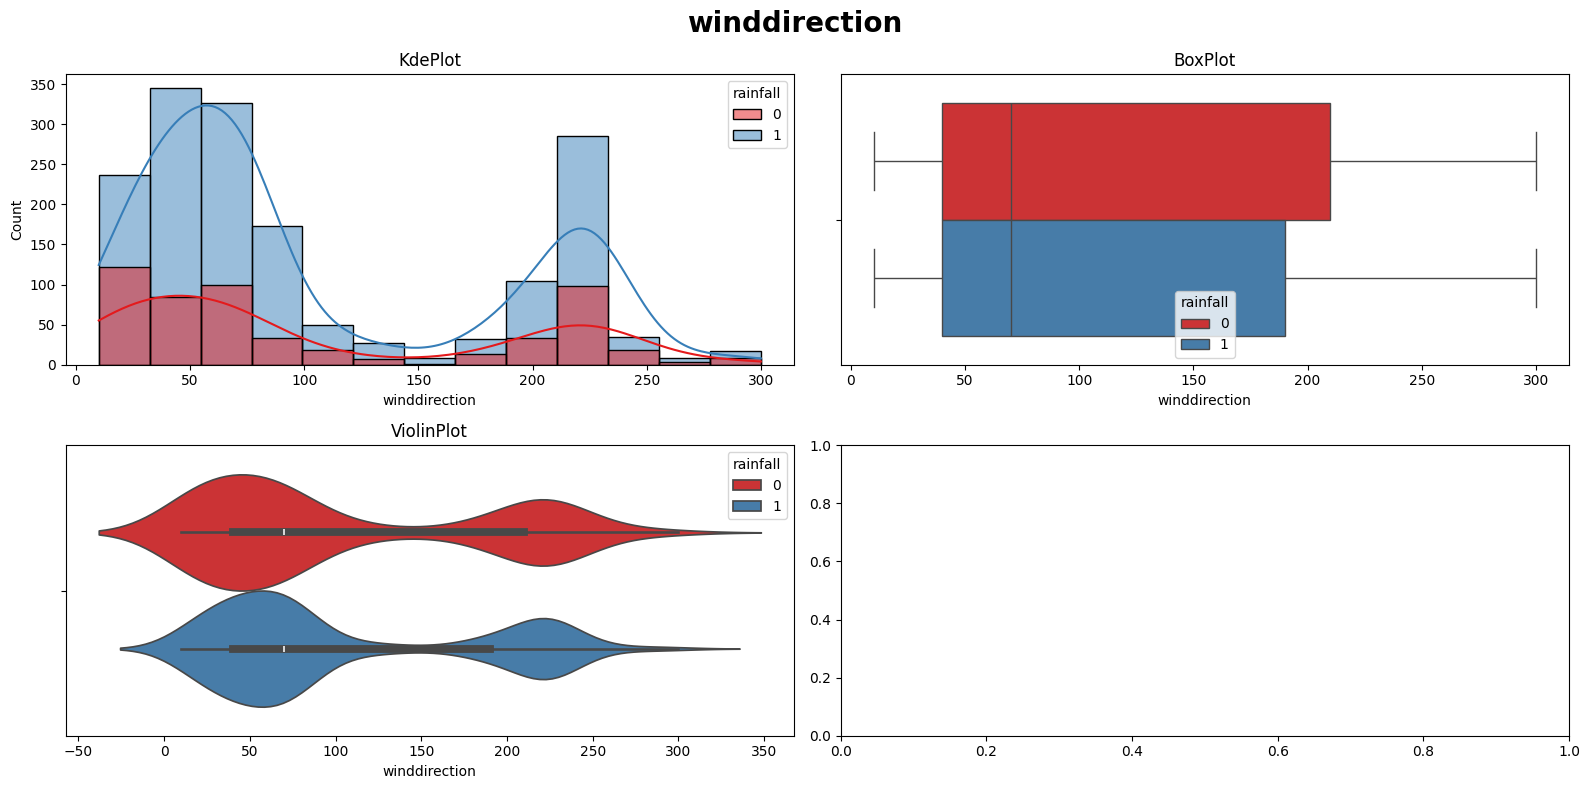

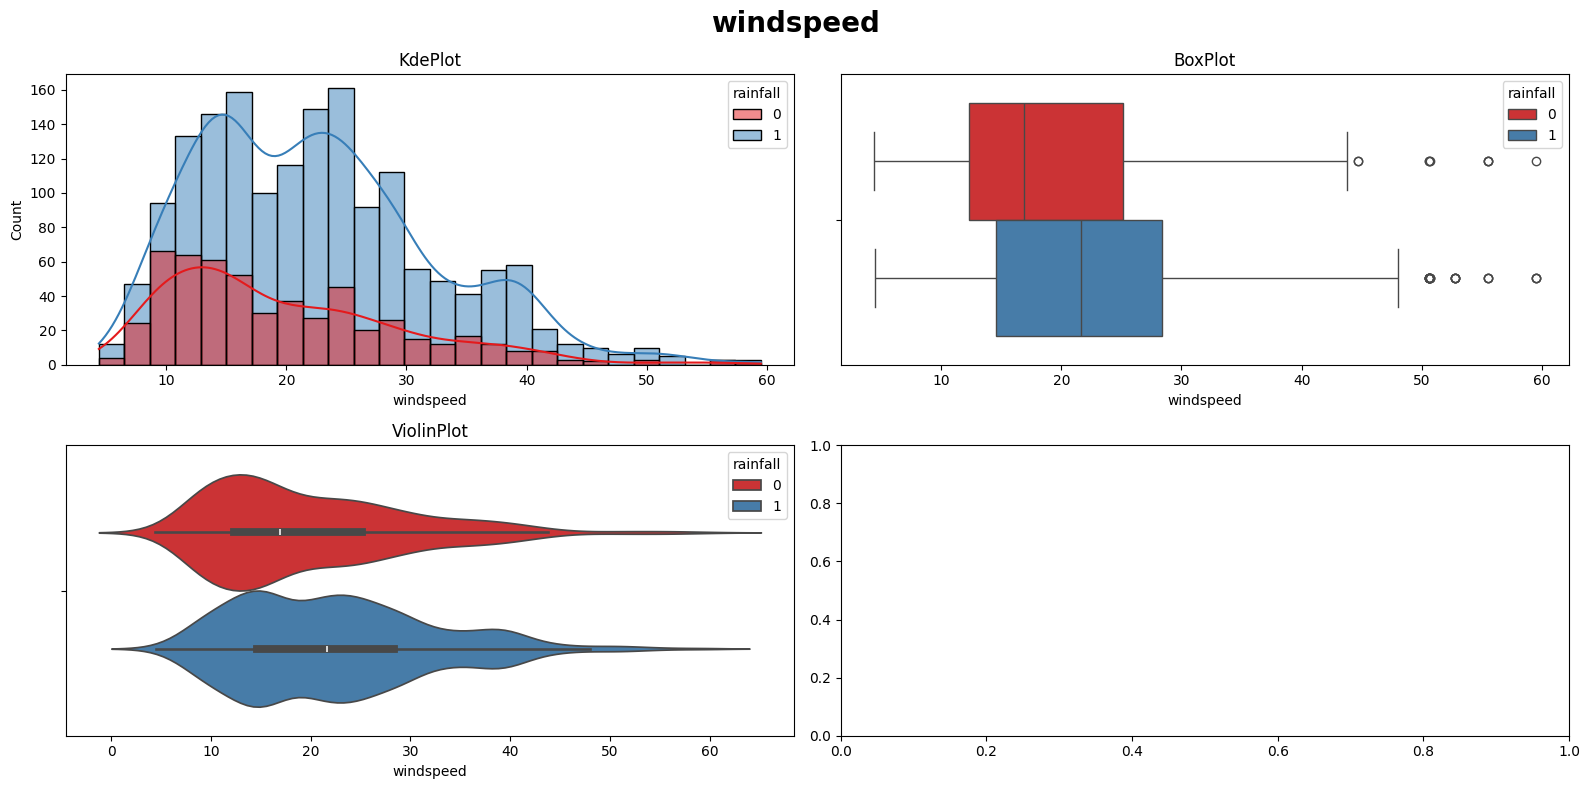

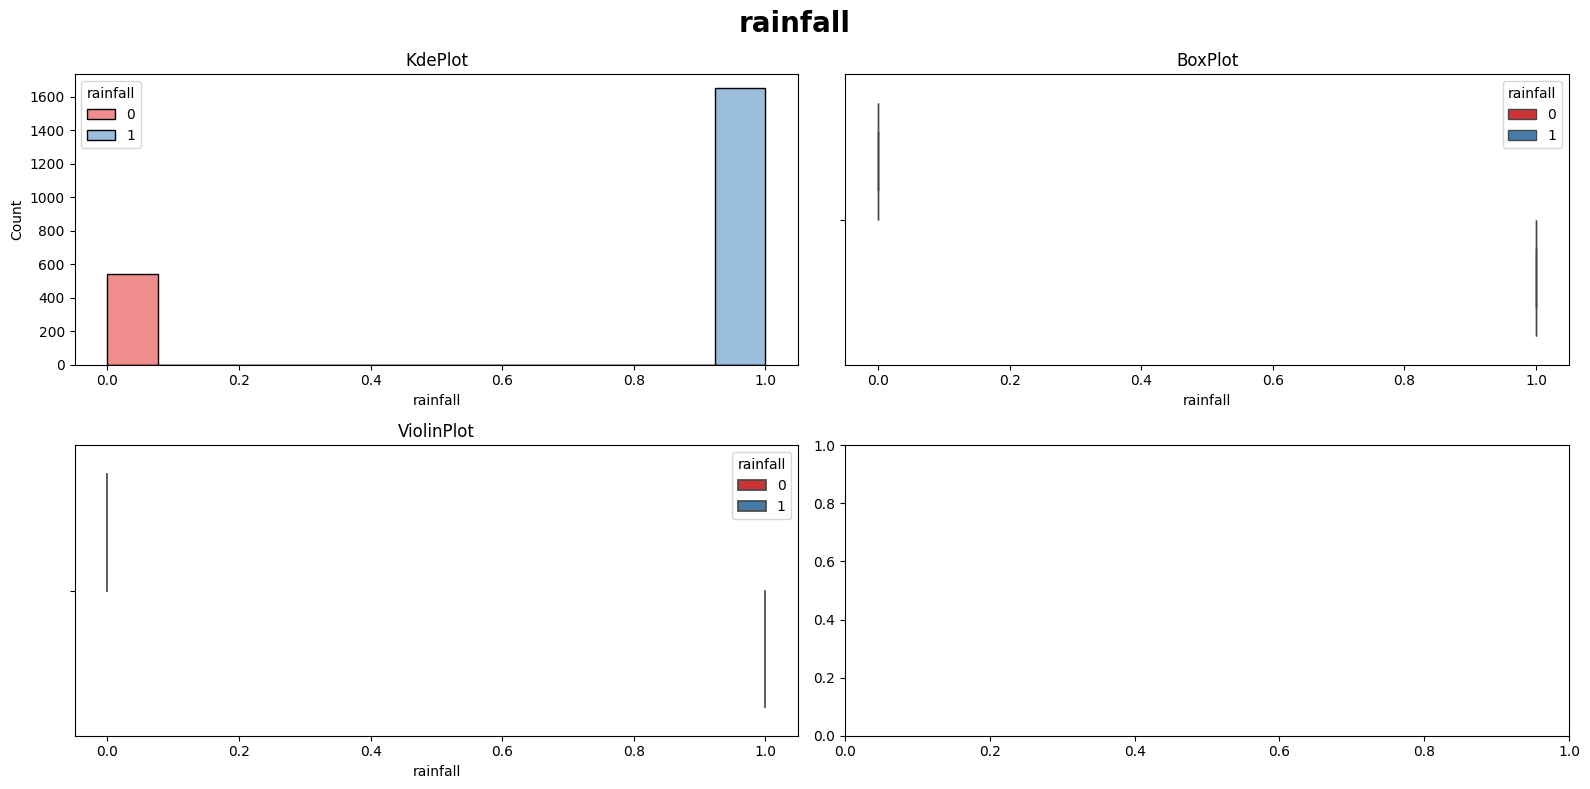

In [23]:
for col in df.columns:
    eda_wrt_rainfall(col)

<Axes: >

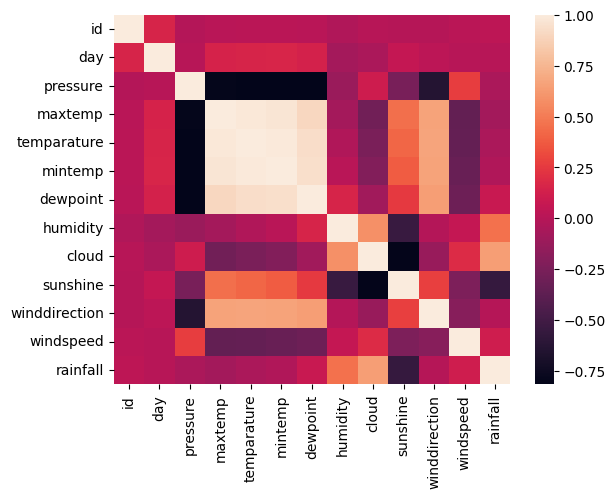

In [24]:
sns.heatmap(df.corr(), )

In [28]:
for col in df.columns:
    print(f"For {col} Skewness is {df[col].skew()}")

For id Skewness is 0.0
For day Skewness is 0.03061504429438121
For pressure Skewness is 0.28406229638059605
For maxtemp Skewness is -0.49089026324343005
For temparature Skewness is -0.5574710596213873
For mintemp Skewness is -0.6491785978493053
For dewpoint Skewness is -0.9978891683988873
For humidity Skewness is -0.561541093572786
For cloud Skewness is -1.339274466854246
For sunshine Skewness is 0.6398714088553171
For winddirection Skewness is 0.7080629783202128
For windspeed Skewness is 0.7693895995074559
For rainfall Skewness is -1.176743335384192


**Observation set**

- From day 75 to 125 chances of happening rain are more.
- Data is not normally distributed. Multiple Columns need to be Normalized.
- 